In [1]:
##Código para trabalho da base filtrados conforme o Fluxo desenhado Fluxo_Pesquisa.pptx

import pandas as pd
from pandas_ods_reader import read_ods
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
dados= pd.read_csv("Anatel.csv")

linhas= dados.index
colunas= dados.columns

C:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (54) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<AxesSubplot:>

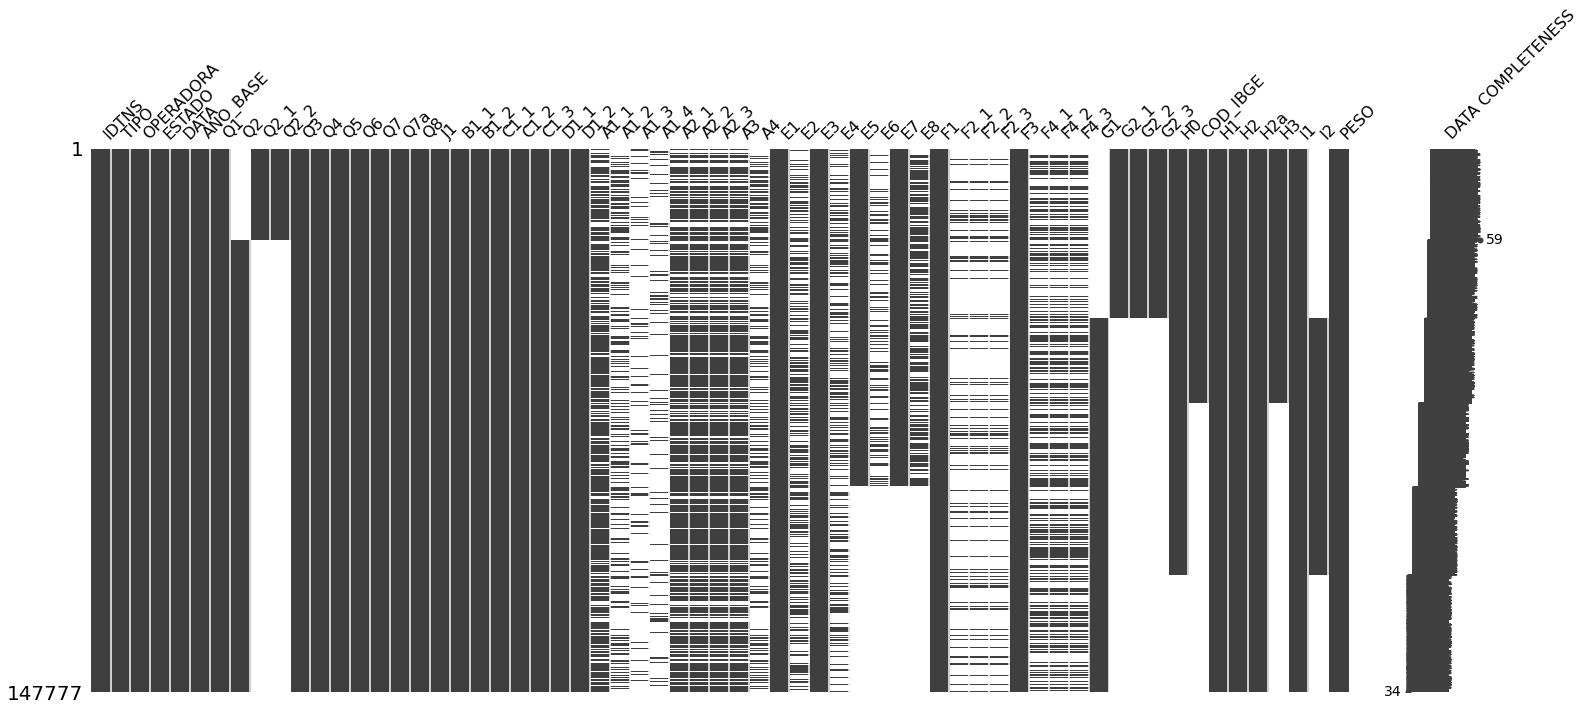

In [4]:
#Visualize MissingValues
%matplotlib inline
msno.matrix(dados, labels=True)

# Definições de Filtros

* Anos 2017 a 2020
* Apenas Pessoas que entraram em contato por telefone e avaliaram o quesito A1_1 ==1 (E)
* Apenas Pessoas que entraram em contato para falar sobre problemas e avaliaram o quesito E7 == 1(E)
* Apenas Pessoas que solicitaram Reparos na internet Fixa F3 == 1(E)
* Apenas Pessoas que entraram em contato para falar sobre problemas na cobrança E1 == 1(E)
* Não será considerado a área de Trabalho do Entrevistado (Q2 REMOVIDO)(E)
* Não será considerado perguntas sobre a concorrência (G1 REMOVIDO)

Os dados foram filtrados devido a alguns motivos, sendo eles: 
* 66% dos entrevistados entraram em contato para falar sobre problemas;
* 78% entraram em contato por telefone
* 48% Solicitaram reparos
* 46% Entraram em Contato para Falar sobre Problemas na Cobrança

In [2]:
Data_Filter = dados.copy()

Data_Filter = Data_Filter[ dados["ANO_BASE"] > 2016]
Data_Filter = Data_Filter[ Data_Filter["E1"] == 1]
Data_Filter = Data_Filter[ Data_Filter["E7"] == 1]
Data_Filter = Data_Filter[ Data_Filter["F3"] == 1]
Data_Filter = Data_Filter[ Data_Filter["A1_1"] == 1]


Data_Filter["ESTADO"] = Data_Filter["ESTADO"].astype('category').cat.codes
Data_Filter["OPERADORA"] = Data_Filter["OPERADORA"].astype('category').cat.codes
Data_Filter.drop("Q2", inplace= True, axis = 1)
Data_Filter.drop("Q2_1", inplace= True, axis = 1)
Data_Filter.drop("Q2_2", inplace= True, axis = 1)
Data_Filter.drop("Q3", inplace= True, axis = 1)
Data_Filter.drop("Q4", inplace= True, axis = 1)
Data_Filter.drop("Q7a", inplace= True, axis = 1)
Data_Filter.drop("A1_1", inplace= True, axis = 1)
Data_Filter.drop("A1_4", inplace= True, axis = 1)
Data_Filter.drop("A4", inplace= True, axis = 1)
Data_Filter.drop("G2_1", inplace= True, axis = 1)
Data_Filter.drop("G2_2", inplace= True, axis = 1)
Data_Filter.drop("G2_3", inplace= True, axis = 1)
Data_Filter.drop("E1", inplace= True, axis = 1)
Data_Filter.drop("E4", inplace= True, axis = 1)
Data_Filter.drop("E6", inplace= True, axis = 1)
Data_Filter.drop("E7", inplace= True, axis = 1)
Data_Filter.drop("F2_1", inplace= True, axis = 1)
Data_Filter.drop("F2_2", inplace= True, axis = 1)
Data_Filter.drop("F2_3", inplace= True, axis = 1)
Data_Filter.drop("F3", inplace= True, axis = 1)
Data_Filter.drop("I1", inplace= True, axis = 1)
Data_Filter.drop("PESO", inplace= True, axis = 1)
Data_Filter.drop("Q1", inplace= True, axis = 1)
Data_Filter.drop("Q6", inplace= True, axis = 1)
Data_Filter.drop("H3", inplace= True, axis = 1)
Data_Filter.drop("COD_IBGE", inplace= True, axis = 1)
Data_Filter.drop("H2a", inplace= True, axis = 1)



Data_Filter["A1_2"] = Data_Filter["A1_2"].replace(2,1)
Data_Filter["A1_3"] = Data_Filter["A1_3"].replace(3,1)
Data_Filter["A1_2"] = Data_Filter["A1_2"].fillna(2)
Data_Filter["A1_3"] = Data_Filter["A1_3"].fillna(2)


# Heatmap Geral

Primeiro é realizado um Heatmap Geral com a finalidade de identificar as principais correlações e entender melhor a base de dados. Para isso, é utilizado a biblioteca Seaborn para plot do Heatmap. 

[Text(0, 0.5, 'IDTNS'),
 Text(0, 1.5, 'OPERADORA'),
 Text(0, 2.5, 'ESTADO'),
 Text(0, 3.5, 'ANO_BASE'),
 Text(0, 4.5, 'Q5'),
 Text(0, 5.5, 'Q7'),
 Text(0, 6.5, 'Q8'),
 Text(0, 7.5, 'J1'),
 Text(0, 8.5, 'B1_1'),
 Text(0, 9.5, 'B1_2'),
 Text(0, 10.5, 'C1_1'),
 Text(0, 11.5, 'C1_2'),
 Text(0, 12.5, 'C1_3'),
 Text(0, 13.5, 'D1_1'),
 Text(0, 14.5, 'D1_2'),
 Text(0, 15.5, 'A1_2'),
 Text(0, 16.5, 'A1_3'),
 Text(0, 17.5, 'A2_1'),
 Text(0, 18.5, 'A2_2'),
 Text(0, 19.5, 'A2_3'),
 Text(0, 20.5, 'A3'),
 Text(0, 21.5, 'E2'),
 Text(0, 22.5, 'E3'),
 Text(0, 23.5, 'E5'),
 Text(0, 24.5, 'E8'),
 Text(0, 25.5, 'F1'),
 Text(0, 26.5, 'F4_1'),
 Text(0, 27.5, 'F4_2'),
 Text(0, 28.5, 'F4_3'),
 Text(0, 29.5, 'G1'),
 Text(0, 30.5, 'H1'),
 Text(0, 31.5, 'H2'),
 Text(0, 32.5, 'I2')]

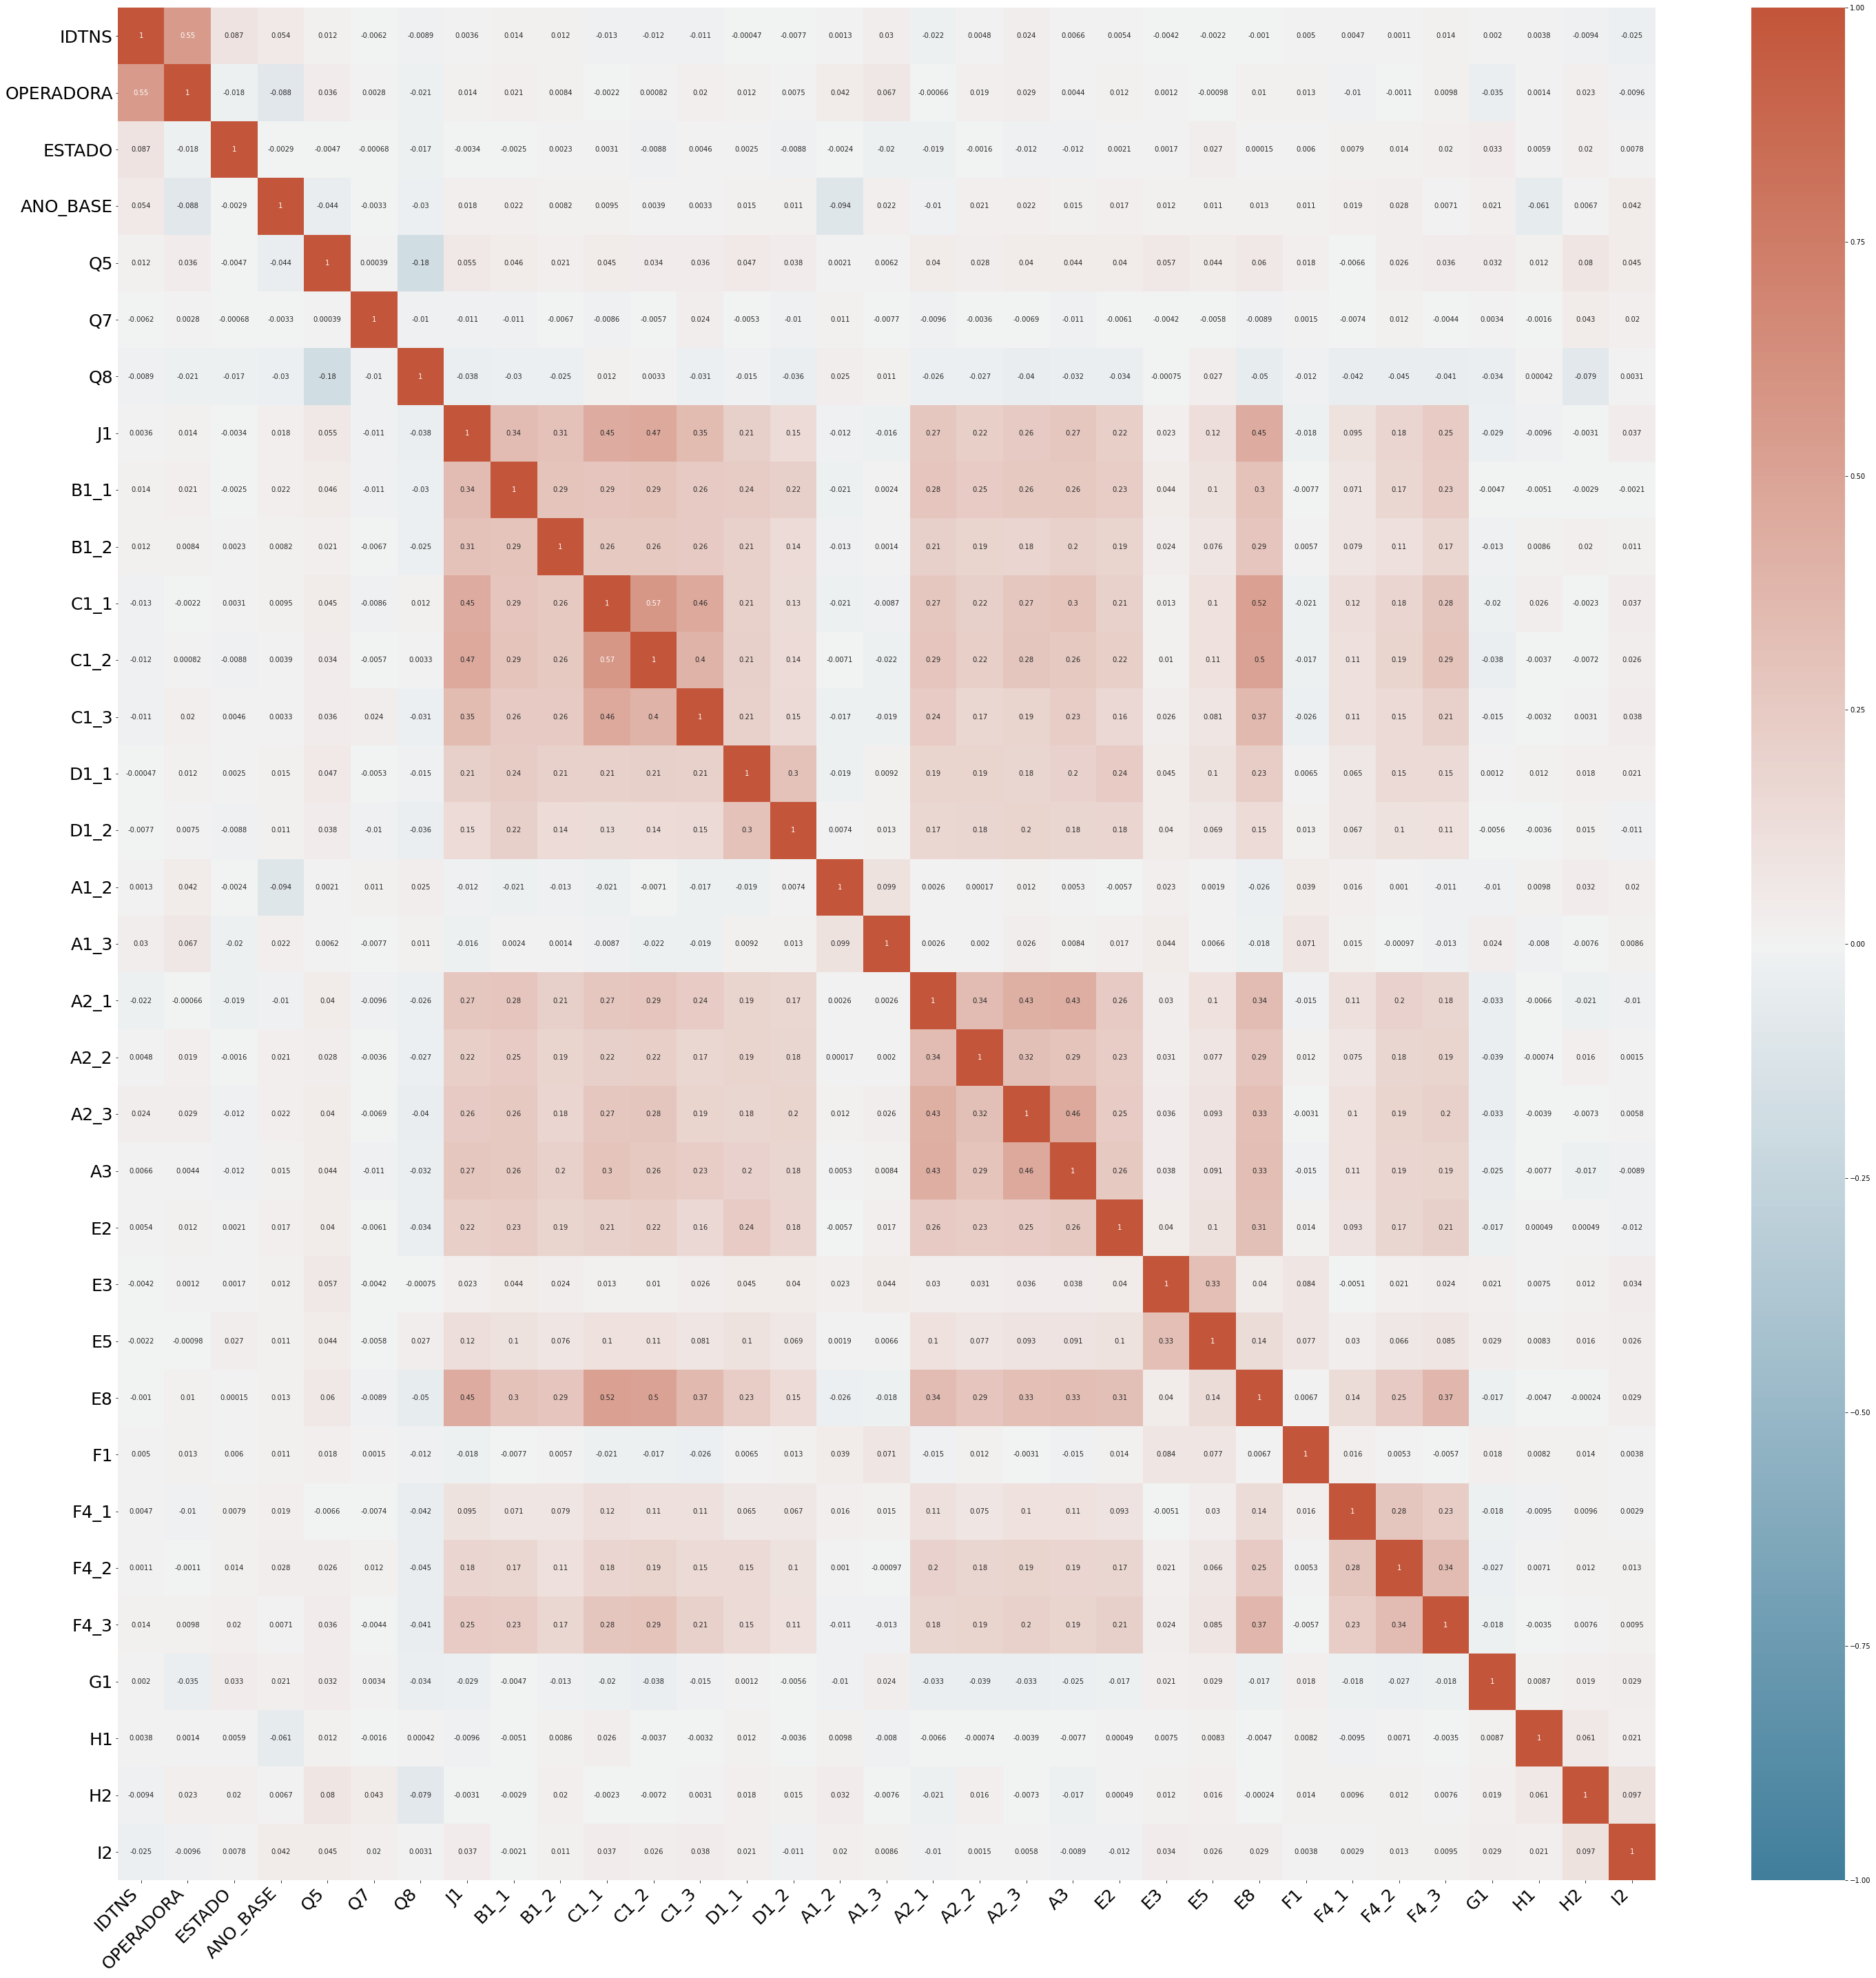

In [3]:
corr_matrix = Data_Filter.corr()
f, ax = plt.subplots(figsize=(50, 50))

#mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, vmin=-1, vmax=1, center=0, annot=True, cmap=cmap)
ax.set_xticklabels(
    ax.get_xticklabels(),
    size = 25,
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    size = 25,
    rotation=0,
    horizontalalignment='right'
)


# Correlações Entre Colunas
Alguns Plots de Correlação entre colunas. 
* Primeiro é utilizada a função crosstab Que acumula valores conforme dois atributos
* Depois é chamada o Seaborn Heatmap

# def PlotaCorrelacaoEntreColunas

A função plota um heatmap entre duas colunas para identificar a correlação entre elas. Basta passar os seguintes parâmetros:
* ColunaX: A coluna do df a qual será representada pelo Eixo X
* ColunaY: A coluna do df a qual será representada pelo Eixo Y
* LabelX: O texto do eixo X
* LabelY: O texto do eixo Y
* Titulo: O titulo do Grafico

In [35]:
def PlotaCorrelacaoEntreColunas(ColunaX, ColunaY, LabelX, LabelY, Titulo):
    heat1 = pd.crosstab(Data_Filter[ColunaX], Data_Filter[ColunaY])
    heat1 = heat1.sort_index(ascending = False)

    f, ax = plt.subplots(figsize=(50, 50))

    #mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    cmap = sns.color_palette("rocket_r", as_cmap=True)
    sns.heatmap(heat1, cmap=cmap, annot_kws={"fontsize":50})
    sns.set(font_scale=4)
    plt.title(Titulo)
    plt.xlabel(LabelX)
    plt.ylabel (LabelY)
    ax.set_xticklabels(
        ax.get_xticklabels(),
        size = 25,
        rotation=45,
        horizontalalignment='right'
    )
    ax.set_yticklabels(
        ax.get_yticklabels(),
        size = 25,
        rotation=0,
        horizontalalignment='right'
    )

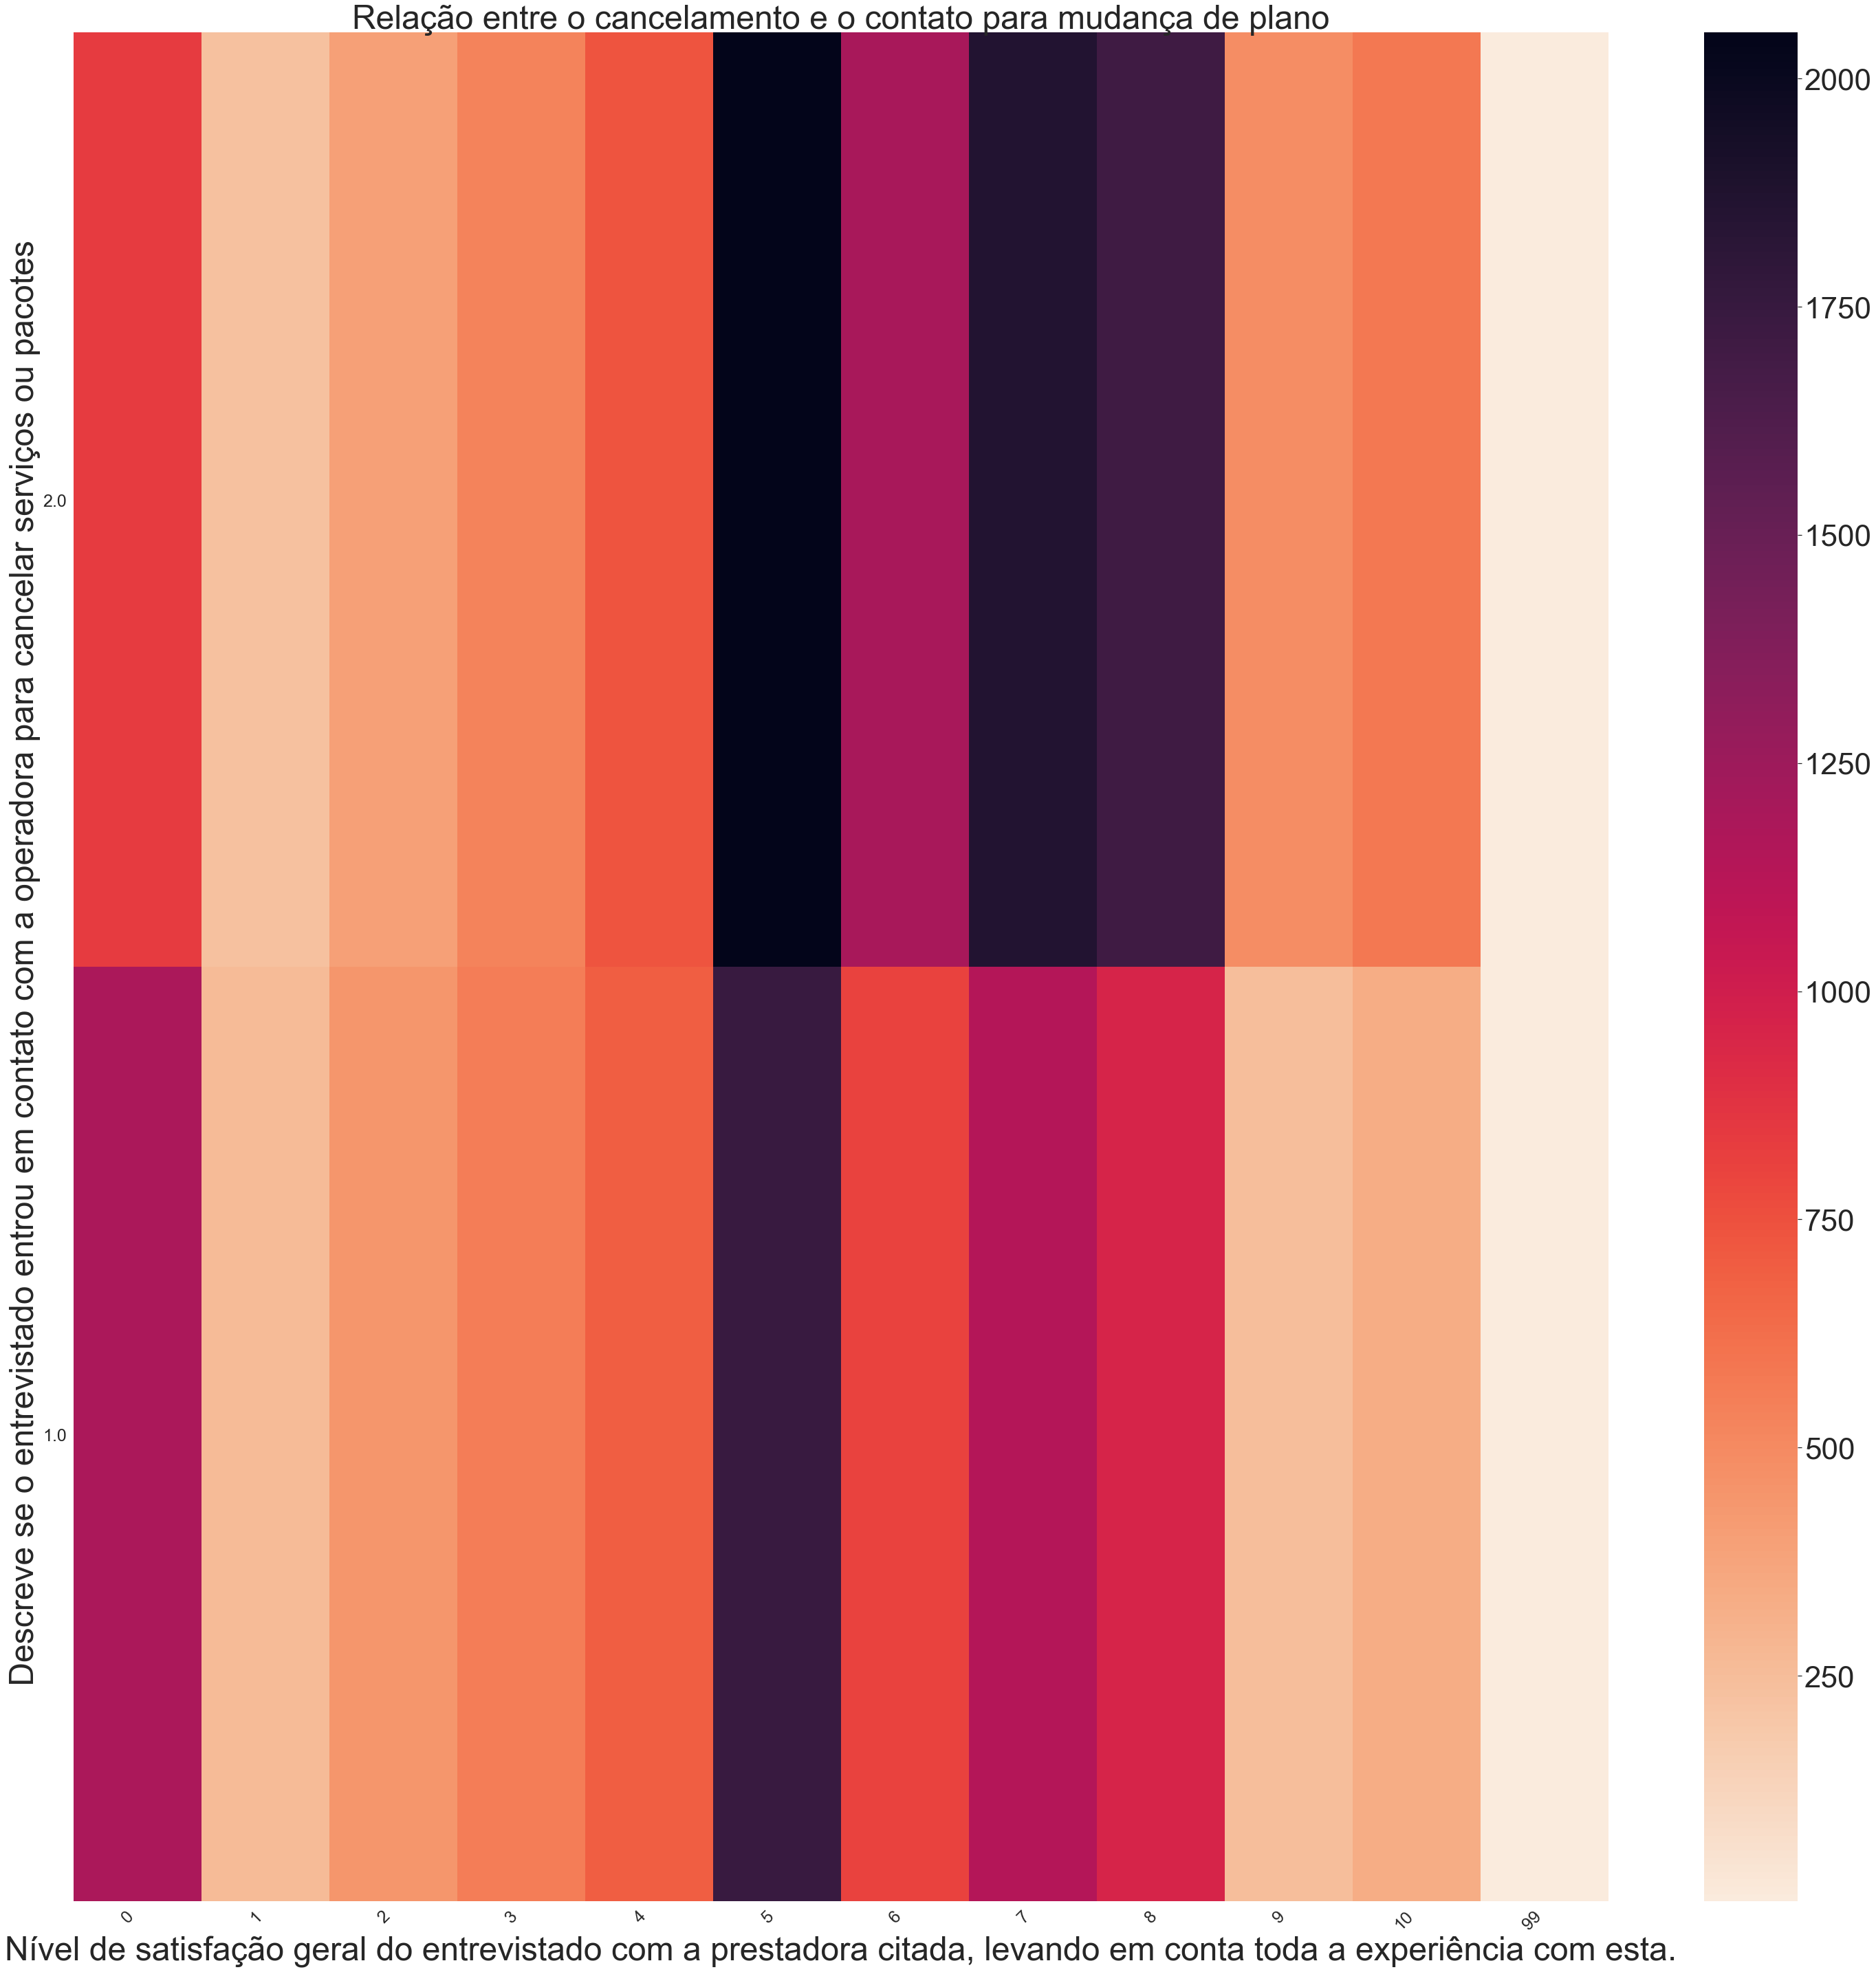

In [44]:
PlotaCorrelacaoEntreColunas("E5", "J1","Nível de satisfação geral do entrevistado com a prestadora citada, levando em conta toda a experiência com esta.", " Descreve se o entrevistado entrou em contato com a operadora para cancelar serviços ou pacotes", "Relação entre o cancelamento e o contato para mudança de plano")